<a href="https://colab.research.google.com/github/Lenakirara/imersao-dados-alura/blob/main/Desafios_Aula04_imersao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafios aula 04 - Machine Learning

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fonte = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(fonte)
dados.head(1)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B


In [13]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

In [14]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

In [15]:
sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")

In [16]:
provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO'] 
provas_saida = 'NU_NOTA_MT'
sem_notas_zero = sem_notas_zero[provas].dropna()
notas_entrada = sem_notas_zero[provas_entrada]
notas_saida = sem_notas_zero[provas_saida]

In [17]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [18]:
x = notas_entrada
y = notas_saida

In [19]:
from sklearn.model_selection import train_test_split

SEED = 45

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

### Desafio 01: Procurar outro modelo de ML para treinar e comparar com os modelos criados em aula



In [20]:
# usando modelo RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# criando o modelo
modelo_rfr = RandomForestRegressor()

In [21]:
modelo_rfr.fit(x_treino, y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [22]:
# previsão do modelo com referencia nota matematica
pred_rfr_mt = modelo_rfr.predict(x_teste)

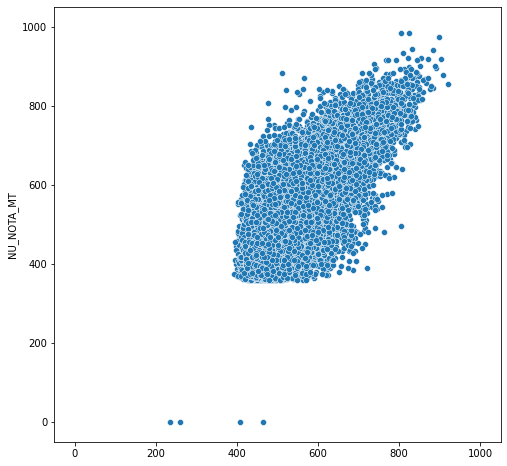

In [23]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=pred_rfr_mt, y=y_teste)
plt.xlim((-50, 1050))
plt.ylim((-50, 1050));

In [27]:
resultados = pd.DataFrame()
resultados['Real'] = y_teste
resultados['Previsao'] = pred_rfr_mt
resultados['Diferenca'] = resultados['Real']  - resultados['Previsao'] 
resultados['Diferenca_quadrado'] = (resultados['Real']  - resultados['Previsao'])**2
resultados

,Real,Previsao,Diferenca,Diferenca_quadrado
101775,424.3,521.396,-97.096,9427.633216
35117,527.6,631.326,-103.726,10759.083076
61432,457.6,615.689,-158.089,24992.131921
85130,578.3,589.865,-11.565,133.749225
30184,425.7,419.303,6.397,40.921609
...,...,...,...,...
86406,490.2,549.078,-58.878,3466.618884
117096,418.5,467.986,-49.486,2448.864196
96111,799.0,756.337,42.663,1820.131569
11623,427.3,462.084,-34.784,1209.926656


In [29]:
resultados['Diferenca_quadrado'].mean()

5767.325445152499

In [30]:
resultados['Diferenca_quadrado'].mean()**(1/2)

75.94290911699721

### Desafio 02: Ler a documentação do Dummy e alterar o método de regressão



In [31]:
# usando DummyRegressor
from sklearn.dummy import DummyRegressor
# criando o modelo
modelo_dummy = DummyRegressor(strategy = 'median', constant=None, quantile=None)

In [32]:
modelo_dummy.fit(x_treino, y_treino)

DummyRegressor(constant=None, quantile=None, strategy='median')

In [33]:
pred_dummyrg_mt = modelo_dummy.predict(x_teste)

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, pred_dummyrg_mt)

12359.504641452344

### Desafio03: Buscar outra métrica para avaliar modelos de regressão


In [37]:
# usndo metrica - mean_absolute_error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, pred_dummyrg_mt)

88.55129457531879

In [38]:
mean_absolute_error(y_teste, pred_rfr_mt)

60.73762373027879

In [39]:
# usando metricar 2_score
from sklearn.metrics import r2_score
r2_score(y_teste, pred_dummyrg_mt)

-0.04282295756858234

In [40]:
r2_score(y_teste, pred_rfr_mt)

0.5133866969228522